In [176]:
import warnings
warnings.filterwarnings('ignore')

In [177]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15.0,7.0)

In [178]:
headbrain = pd.read_csv('headbrain.csv')
print(headbrain.shape)
headbrain.head()

(237, 4)


,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [179]:
X = headbrain['Head Size(cm^3)'].values
y = headbrain['Brain Weight(grams)'].values

In [180]:
print(type(X),type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [181]:
X = X.reshape(len(X),1)

In [182]:
from sklearn.model_selection import train_test_split

In [183]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [184]:
from sklearn.linear_model import LinearRegression

In [185]:
lm = LinearRegression()

In [186]:
lm = lm.fit(X_train,y_train)

In [187]:
lm.coef_

array([0.26666821])

In [188]:
lm.intercept_

317.38027443771534

In [189]:
y_pred_test = lm.predict(X_test)

In [190]:
y_pred_train = lm.predict(X_train)

In [191]:
from sklearn import metrics

In [192]:
metrics.r2_score(y_train,y_pred_train)

0.6306958327544407

In [193]:
metrics.r2_score(y_test,y_pred_test)

0.6572170509169564

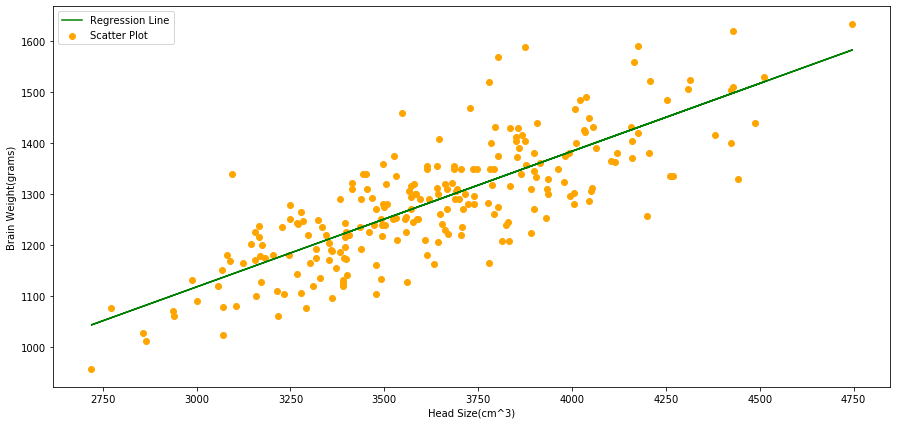

In [194]:
plt.scatter(X, y,c='orange',label='Scatter Plot')
plt.plot(X, 0.26666821*X + 317.38027443771534,c='g',label='Regression Line')
plt.xlabel('Head Size(cm^3)')
plt.ylabel('Brain Weight(grams)')
plt.legend()
plt.show()

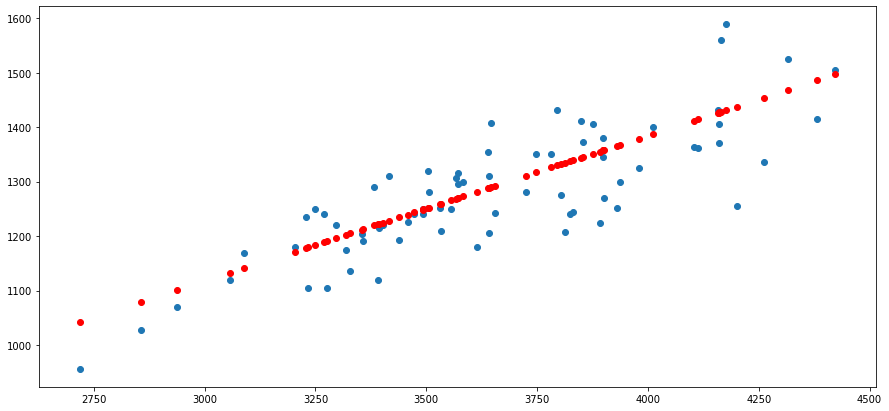

In [200]:
plt.scatter(X_test,y_test)
plt.scatter(X_test, y_pred_test, color='r')

## Stats model

In [196]:
import statsmodels.api as sm

In [197]:
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()

In [198]:
lr.params

array([3.17380274e+02, 2.66668206e-01])

In [199]:
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     278.4
Date:                Tue, 17 Sep 2019   Prob (F-statistic):           4.32e-37
Time:                        22:07:39   Log-Likelihood:                -944.52
No. Observations:                 165   AIC:                             1893.
Df Residuals:                     163   BIC:                             1899.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        317.3803     58.256      5.448      0.0